# TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). It is commonly used in information retrieval and text mining. TF-IDF is calculated by multiplying two metrics: Term Frequency (TF) and Inverse Document Frequency (IDF). TF-IDF vectors are often used in machine learning and natural language processing tasks to represent text data.

In [1]:
import pandas as pd

df = pd.read_csv("SMSSpamCollection.csv", sep="\t", names=["label", "message"])

In [2]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
# Data cleaning and preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [5]:
corpus = []
for i in range(0, len(df)):
    review = re.sub("[^a-zA-Z]", " ", df["message"][i]) # keep only letters
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

In [6]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [7]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)

In [8]:
X = vectorizer.fit_transform(corpus).toarray()

In [9]:
X.shape

(5572, 500)

In [10]:
import numpy as np

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3f" % x))

In [11]:
X

array([[0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.480, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.661, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000

In [17]:
vectorizer.vocabulary_

{'go': 155,
 'point': 326,
 'great': 163,
 'world': 483,
 'got': 161,
 'wat': 461,
 'ok': 294,
 'lar': 210,
 'wif': 472,
 'free': 143,
 'entry': 125,
 'win': 475,
 'st': 395,
 'may': 247,
 'text': 410,
 'receive': 346,
 'question': 339,
 'txt': 444,
 'rate': 341,
 'apply': 19,
 'dun': 114,
 'say': 361,
 'early': 116,
 'already': 10,
 'think': 417,
 'life': 223,
 'around': 21,
 'though': 420,
 'hey': 183,
 'week': 465,
 'word': 480,
 'back': 32,
 'like': 224,
 'fun': 148,
 'still': 399,
 'xxx': 490,
 'send': 368,
 'even': 127,
 'brother': 48,
 'speak': 393,
 'per': 310,
 'set': 371,
 'friend': 144,
 'network': 278,
 'customer': 89,
 'selected': 367,
 'prize': 334,
 'claim': 69,
 'call': 53,
 'code': 74,
 'valid': 450,
 'hour': 190,
 'mobile': 261,
 'month': 264,
 'update': 446,
 'latest': 214,
 'colour': 77,
 'camera': 57,
 'co': 73,
 'gonna': 159,
 'home': 187,
 'soon': 390,
 'want': 459,
 'talk': 407,
 'stuff': 402,
 'tonight': 432,
 'enough': 124,
 'today': 426,
 'chance': 63,
 'cash

In [12]:
# TF-IDF with N-grams
vectorizer_ngram = TfidfVectorizer(max_features=500, ngram_range=(1, 2))
X_ngram = vectorizer_ngram.fit_transform(corpus).toarray()

In [13]:
X_ngram.shape

(5572, 500)

In [14]:
X_ngram

array([[0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.480, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000, 0.661, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000

In [18]:
vectorizer_ngram.vocabulary_

{'go': 153,
 'point': 331,
 'great': 163,
 'world': 483,
 'got': 161,
 'wat': 462,
 'ok': 297,
 'lar': 211,
 'wif': 473,
 'free': 140,
 'entry': 122,
 'win': 475,
 'st': 399,
 'may': 250,
 'text': 413,
 'receive': 350,
 'question': 343,
 'txt': 444,
 'rate': 345,
 'apply': 18,
 'dun': 112,
 'say': 364,
 'early': 114,
 'already': 9,
 'think': 420,
 'life': 225,
 'around': 20,
 'though': 422,
 'hey': 185,
 'week': 466,
 'word': 480,
 'back': 29,
 'like': 226,
 'fun': 146,
 'still': 402,
 'xxx': 490,
 'send': 371,
 'even': 124,
 'brother': 45,
 'speak': 397,
 'per': 312,
 'set': 375,
 'friend': 142,
 'network': 281,
 'customer': 86,
 'selected': 370,
 'prize': 338,
 'claim': 67,
 'call': 50,
 'code': 73,
 'valid': 450,
 'hour': 191,
 'mobile': 264,
 'month': 267,
 'update': 446,
 'latest': 215,
 'colour': 76,
 'camera': 56,
 'co': 71,
 'free call': 141,
 'gonna': 157,
 'home': 188,
 'soon': 393,
 'want': 460,
 'talk': 410,
 'stuff': 405,
 'tonight': 433,
 'enough': 121,
 'today': 428,
 'c

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

ngram_ranges = [(1,1), (1,2), (1,3), (2,2), (2,3)]
max_features_list = [500, 1000, 1500, 2000, 3000]

In [20]:
results = []
for ngram_range in ngram_ranges:
    print(f"N-gram range {ngram_range}:")
    print("-" * 40)
    for max_feat in max_features_list:
        vectorizer = TfidfVectorizer(
            max_features=max_feat,
            ngram_range=ngram_range
        )

        X = vectorizer.fit_transform(corpus)

        actual_features = len(vectorizer.vocabulary_)

        classifier = MultinomialNB()
        scores = cross_val_score(classifier, X, df["label"], cv=5)

        result = {
            'ngram_range': ngram_range,
            'max_features': max_feat,
            'actual_features': actual_features,
            'cv_score': scores.mean(),
            'cv_std': scores.std()
        }
        results.append(result)

        print(
            f"  max_features={max_feat}: Score={scores.mean():.3f}±{scores.std():.3f}, Features={actual_features}")

    print()

results_df = pd.DataFrame(results)
print("=== SUMMARY TABLE ===")
print(results_df.to_string(index=False))

N-gram range (1, 1):
----------------------------------------
  max_features=500: Score=0.973±0.002, Features=500
  max_features=1000: Score=0.978±0.004, Features=1000
  max_features=1500: Score=0.979±0.003, Features=1500
  max_features=2000: Score=0.980±0.003, Features=2000
  max_features=3000: Score=0.978±0.004, Features=3000

N-gram range (1, 2):
----------------------------------------
  max_features=500: Score=0.976±0.002, Features=500
  max_features=1000: Score=0.979±0.002, Features=1000
  max_features=1500: Score=0.980±0.002, Features=1500
  max_features=2000: Score=0.978±0.002, Features=2000
  max_features=3000: Score=0.977±0.003, Features=3000

N-gram range (1, 3):
----------------------------------------
  max_features=500: Score=0.975±0.002, Features=500
  max_features=1000: Score=0.978±0.002, Features=1000
  max_features=1500: Score=0.979±0.002, Features=1500
  max_features=2000: Score=0.978±0.002, Features=2000
  max_features=3000: Score=0.975±0.003, Features=3000

N-gram 

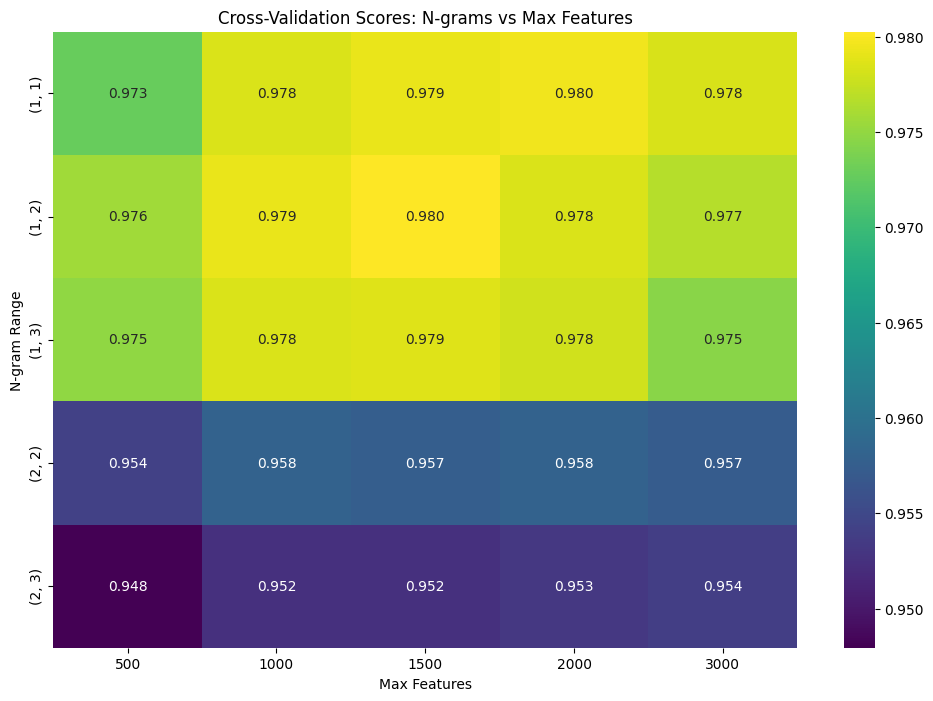


Best combination:
N-gram range: (1, 2)
Max features: 1500
Score: 0.980


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_scores = results_df.pivot(index='ngram_range', columns='max_features', values='cv_score')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_scores, annot=True, fmt='.3f', cmap='viridis')
plt.title('Cross-Validation Scores: N-grams vs Max Features')
plt.xlabel('Max Features')
plt.ylabel('N-gram Range')
plt.show()

# Find best combination
best_result = results_df.loc[results_df['cv_score'].idxmax()]
print(f"\nBest combination:")
print(f"N-gram range: {best_result['ngram_range']}")
print(f"Max features: {best_result['max_features']}")
print(f"Score: {best_result['cv_score']:.3f}")